# Importing packages

In [127]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import datetime
import math as ma
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [128]:
dataset = pd.ExcelFile('KPMG_data.xlsx')

dataset.sheet_names
new_customerlist = pd.read_excel('KPMG_data.xlsx', sheet_name = 'NewCustomerList')

# Exploration of the New Customer List sheet

In [129]:
new_customerlist.head() #prints the first five rows of the dataset

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Chickie,Brister,Male,86.0,1957-07-12,63.194471,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6.0,0.41,0.5125,0.640625,0.544531,1.0,1.0,1.718750
1,Morly,Genery,Male,69.0,1970-03-22,50.493101,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11.0,0.54,0.5400,0.675000,0.573750,1.0,1.0,1.718750
2,Ardelis,Forrester,Female,10.0,1974-08-28,46.054745,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5.0,0.99,0.9900,0.990000,0.990000,1.0,1.0,1.718750
3,Lucine,Stutt,Female,64.0,1979-01-28,41.632827,Account Representative III,Manufacturing,Affluent Customer,N,...,QLD,Australia,1.0,0.93,1.1625,1.162500,1.162500,4.0,4.0,1.703125
4,Melinda,Hadlee,Female,34.0,1965-09-21,54.994471,Financial Analyst,Financial Services,Affluent Customer,N,...,NSW,Australia,9.0,0.59,0.5900,0.737500,0.737500,4.0,4.0,1.703125


In [66]:
new_customerlist['Age'] = new_customerlist['Age'].round()
new_customerlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,63.0,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,0.97,1.2125,1.515625,1.288281,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,50.0,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,0.41,0.4100,0.512500,0.435625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,46.0,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,0.62,0.6200,0.620000,0.620000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,42.0,Account Representative III,Manufacturing,Affluent Customer,N,...,QLD,Australia,1,0.88,1.1000,1.100000,1.100000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,55.0,Financial Analyst,Financial Services,Affluent Customer,N,...,NSW,Australia,9,0.87,0.8700,1.087500,1.087500,4,4,1.703125


In [67]:
new_customerlist.info() #prints the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   Age                                  1000 non-null   float64       
 6   job_title                            894 non-null    object        
 7   job_industry_category                835 non-null    object        
 8   wealth_segment                       1000 non-null   object        
 9   deceased_indicator                   1000 non-null   object        
 10  owns_car     

## Dropping Unnamed Columns

In [69]:
cols = ['Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21']
new_customerlist = new_customerlist.drop(cols, axis=1)

## Checking for missing values

In [70]:
new_customerlist.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
Age                                      0
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

We can either keep or drop the missing values based on the next steps of analysis.

## Checking for duplicate values

In [71]:
new_customerlist.duplicated().sum()

0

No duplicated values present in the dataset.

## Checking columns

In [72]:
new_customerlist.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [73]:
new_customerlist['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [74]:
new_customerlist['gender'].str.replace('U','Unspecified').head() # Replacing 'U' with 'Unspecified'

0      Male
1      Male
2    Female
3    Female
4    Female
Name: gender, dtype: object

In [75]:
new_customerlist['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [76]:
new_customerlist['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

In [77]:
new_customerlist['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [78]:
new_customerlist['DOB'].describe()

count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

# Data Analysis Visualizations

## Gender vs Bikes Purchased

[513, 470, 17]


([<matplotlib.axis.XTick at 0x123913d00>,
 [Text(0, 0, 'Female'),
  Text(0, 0, "F's P"),
  Text(0, 0, 'Male'),
  Text(0, 0, "M's P"),
  Text(0, 0, 'Unspecified'),
  Text(0, 0, "U's P")])

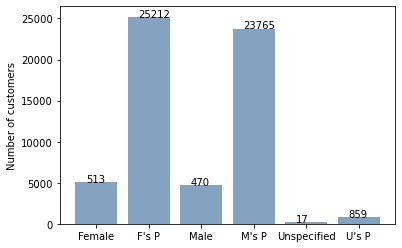

In [79]:
gender = [0,0,0] #first = Female, second = Male, third = Unspecified
for each in new_customerlist['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1
        
print(gender)

def gf(x, pos): # The two args store the value and gender
    return int(x)


bike = [0,0,0] #bikes purchased by F, M, and U respectively 
bike[0] += new_customerlist['past_3_years_bike_related_purchases'][new_customerlist['gender'] == 'Female'].sum() + new_customerlist['past_3_years_bike_related_purchases'][new_customerlist['gender'] == 'F'].sum()
bike[1] += new_customerlist['past_3_years_bike_related_purchases'][new_customerlist['gender'] == 'Male'].sum() + new_customerlist['past_3_years_bike_related_purchases'][new_customerlist['gender'] == 'M'].sum()
bike[2] += new_customerlist['past_3_years_bike_related_purchases'][new_customerlist['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
shade = (0.2 , 0.4 , 0.6 , 0.6)

formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of customers')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = shade)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unspecified', "U's P"))

## Percentage of bikes purchased based on gender

([<matplotlib.axis.XTick at 0x123944bb0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male'), Text(0, 0, 'Unspecified')])

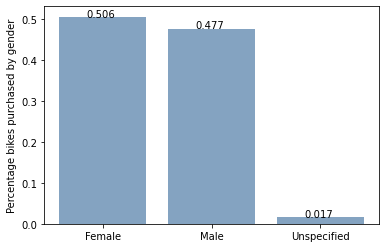

In [80]:
average  = [0,0,0]
ss = sum(bike)
for i in range(len(average)):
    average[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes purchased by gender')
plt.bar(x1, average, color = shade)
for i in range(len(average)):
    plt.text(x = i-0.15, y = average[i], s = average[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unspecified'))

## Job Industry Category vs Customers

In [81]:
new_customerlist['job_industry_category'].value_counts() #lists the number of customers per job industry

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

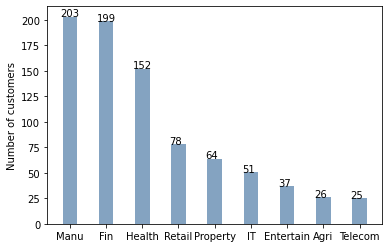

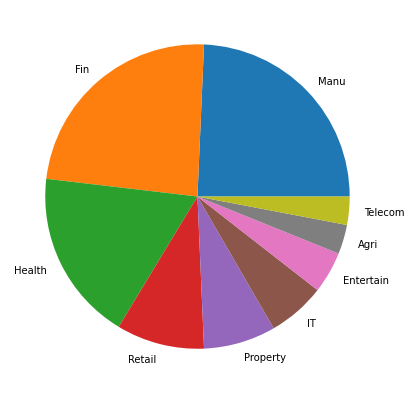

In [153]:
val = [203, 199, 152, 78, 64, 51, 37, 26, 25]

#Creating a bar chart 
x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of customers')
plt.bar(x3, val, color = shade, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manu", "Fin", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))


#Creating a pie chart
categories = ["Manu", "Fin", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"] 
data = [203, 199, 152, 78, 64, 51, 37, 26, 25] 
  
# Creating and showing plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = categories) 
plt.show() 

## Ownership of car vs Customers

In [83]:
new_customerlist["owns_car"].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

([<matplotlib.axis.XTick at 0x1255fbe80>,
 [Text(0, 0, 'Yes'), Text(0, 0, 'No')])

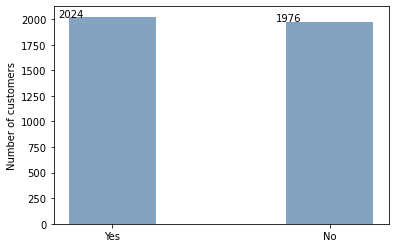

In [84]:
val = [2024, 1976]

x3 = np.arange(2)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of customers')
plt.bar(x3, val, color = shade, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Yes", "No"))

## State vs Customers

In [85]:
new_customerlist['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

([<matplotlib.axis.XTick at 0x12392f7f0>,
 [Text(0, 0, 'NSW'), Text(0, 0, 'VIC'), Text(0, 0, 'QLD')])

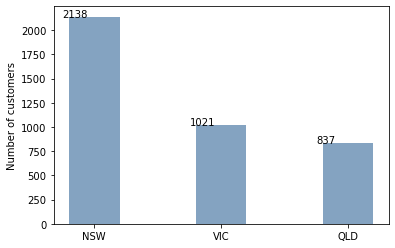

In [116]:
val = [2138, 1021, 837]

x3 = np.arange(3)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of customers')
plt.bar(x3, val, color = shade, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("NSW", "VIC", "QLD"))

## Cars owned or not in each state

([<matplotlib.axis.XTick at 0x1262d5e80>,
 [Text(0, 0, 'nsw_car'),
  Text(0, 0, 'nsw_nc'),
  Text(0, 0, 'vic_car'),
  Text(0, 0, 'vic_nc'),
  Text(0, 0, 'qld_car'),
  Text(0, 0, 'qld_nc')])

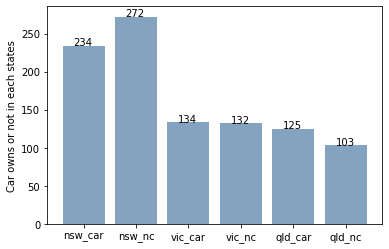

In [115]:
graphgen = [234, 272, 134, 132, 125, 103]

x2 = np.arange(6)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Car owns or not in each states')
plt.bar(x2, graphgen, color = shade)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('nsw_car', "nsw_nc", 'vic_car', "vic_nc", 'qld_car', "qld_nc"))

## Age Distribution of Customers

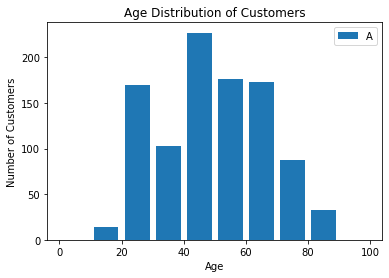

In [155]:
population_ages = new_customerlist['Age']

bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Customers')
plt.legend('Age')
plt.show()

Most of the customers are within the 40-50 age group.

## Wealth Segmentation by age category

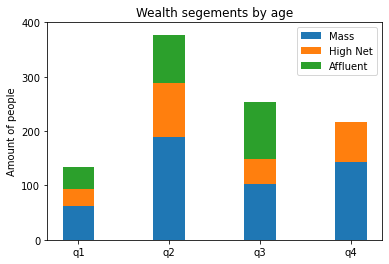

In [159]:
N = 4
ws_mass = [63, 190, 102, 143]
ws_high = [30, 99, 46, 74]
ws_affluent = [41, 88, 106, 0]

bars = np.add(ws_mass, ws_high).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) # the locations for the groups
width = 0.35       # setting the width of the bars

p1 = plt.bar(ind, ws_mass, width)
p2 = plt.bar(ind, ws_high, width,  bottom = ws_mass)
p3 = plt.bar(ind, ws_affluent, width,  bottom = bars)

plt.ylabel('Number of customers')
plt.title('Wealth segments by age')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4')) #0-24, 25-42, 43-59, 59+
plt.yticks(np.arange(0, 500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

plt.show()